In [90]:
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

import numpy as np
import pandas as pd
import math

from ipywidgets import interact,interactive,fixed,interact_manual
import ipywidgets as widgets


## Nozzle Plotter

Input quantities:

- throat radius
- throat curve radius
- expansion half-angle
- ratio of exit area to throat area



In [201]:
class Nozzle:
    def __init__(self,r_t,r_1,alpha,epsilon):
        self.r_t = r_t # radius of throat
        self.r_1 = r_1 # radius of throat curvature
        self.alpha = alpha # expansion half-angle
        self.epsilon = epsilon # throat to exit area ratio
        
        self.recalc() # get derived quantities for initial values
        
    def recalc(self):
        # Establish coordinates for arcs
        self.arcCenter = (0,self.r_t + self.r_1)
        self.arclCenter = (0,-(self.r_t + self.r_1))
        
        # Establish coordinates for wall lines
        #n_x and n_y are coordinates for the entry point
        self.n_x = self.r_1*math.sin(math.radians(self.alpha))
        self.n_y = self.r_t+(self.r_1*(1-math.cos(math.radians(self.alpha))))
        
        #e_x and e_y are coordinates for the exit point
        self.r_e = math.sqrt(self.epsilon)*self.r_t
        self.e_y = self.r_e
        self.e_x = self.n_x + (self.r_e-self.n_y)/math.tan(math.radians(self.alpha))
        
    def newParams(self,r_t,r_1,alpha,epsilon):
        self.r_t = r_t
        self.r_1 = r_1
        self.alpha = alpha # expansion half-angle
        self.epsilon = epsilon # throat to exit area ratio
        
        self.recalc() # get derived quantities for initial values
        self.draw() # draw new figure
        
    def area(self,x): # return area of nozzle at position x
        xmin = -self.r_1  # minimum x
        x_trans = self.n_x # transition x
        x_out = self.e_x # x at exit
        retval = 0
        
        if(x<xmin):
            #print("x below range")
            z=0
        elif(x>=xmin and x<x_trans):
            #x is within inlet circle
            retval = math.pi*((self.r_t+self.r_1)-(math.sqrt((self.r_1**2)-(x**2))))**2
        elif(x>x_trans and x<=x_out):
            # x is in cone area
            m = ((self.e_y-self.n_y)/(self.e_x-self.n_x))
            b = (-m)*(self.n_x)+self.n_y
            
            retval = math.pi*((m*x+b)**2) #d'oh
        else:
            #print("x is above range")
            z=0
        return retval
    
    def draw(self):
        fig = plt.figure(figsize=(10,6))
        ax = fig.add_subplot(111)
        
        axes = plt.gca()
        axes.set_xlim([-1,9])
        axes.set_ylim([-3,3])
        
        figh = 2*self.r_1
        figw = 2*self.r_1
        arc = mpatches.Arc(xy=self.arcCenter,width=figw,height=figh,theta1=180, theta2=270+self.alpha)
        arcLow = mpatches.Arc(xy=self.arclCenter,width=figw,height=figh,theta1=90-self.alpha, theta2=180)
        
        ax.add_patch(arc)
        ax.add_patch(arcLow)
        
        ax.plot([self.n_x,self.e_x],[self.n_y,self.e_y])
        ax.plot([self.n_x,self.e_x],[-self.n_y,-self.e_y])
        
        plt.show()

In [202]:
schnozz = Nozzle(0.5,1,15,5)

w_tr = widgets.FloatSlider(min=0.1,
                           max=1, 
                           step=0.05,
                           value=0.5,
                           continuous_update=False,
                          description = 'Throat Radius') # throat radius widget
w_tc = widgets.FloatSlider(min=0.1, 
                           max=1, 
                           step =0.05,
                           value=0.7,
                           continuous_update=False,
                          description = 'Curve Radius') # throat curve radius widget
w_a = widgets.FloatSlider(min=0.1,
                          max=30, 
                          step=0.1,
                           continuous_update=False,
                         description='Wall Angle') # wall angle widget
w_e = widgets.FloatSlider(min=1.1, 
                          max=10, 
                          step=0.1,
                           continuous_update=False,
                         description='Area Ratio') # area ratio widget
ui = widgets.VBox([w_tr,w_tc,w_a,w_e])

out = widgets.interactive_output(schnozz.newParams, {'r_t':w_tr,'r_1':w_tc,'alpha':w_a,'epsilon':w_e})

display(ui,out)

Output()

-0.7
4.480780005672537
[4.523893421169302, 2.164642049993341, 1.533548139586243, 1.1841671767316102, 0.9752799634098147, 0.8537253104889754, 0.7951115776293536, 0.7890157112685674, 0.8159385399451901, 0.8440104347229009, 0.8725570956766614, 0.9015785228064719, 0.9310747161123325, 0.9610456755942431, 0.9914914012522041, 1.0224118930862147, 1.0538071510962754, 1.085677175282386, 1.1180219656445467, 1.1508415221827575, 1.1841358448970187, 1.2179049337873296, 1.2521487888536902, 1.2868674100961015, 1.322060797514562, 1.3577289511090733, 1.3938718708796343, 1.430489556826245, 1.4675820089489067, 1.5051492272476177, 1.5431912117223787, 1.5817079623731898, 1.6206994792000506, 1.660165762202962, 1.700106811381923, 1.7405226267369347, 1.7814132082679957, 1.8227785559751069, 1.8646186698582683, 1.9069335499174795, 1.9497231961527413, 1.9929876085640525, 2.036726787151414, 2.080940731914825, 2.1256294428542866, 2.1707929199697986, 2.21643116326136, 2.2625441727289717, 2.3091319483726322, 2.356194

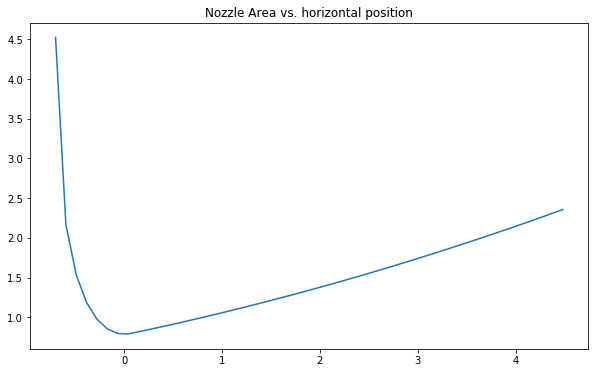

In [203]:
#
# Plotting out area vs. horizontal position
#

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

print(-schnozz.r_1)
print(schnozz.e_x)

xrange = np.linspace(-schnozz.r_1,schnozz.e_x,num=50)
#print(xrange)

yrange = []
for x in xrange:
    yrange.append(schnozz.area(x))
    
print(yrange)

ax.plot(xrange,yrange)
plt.title("Nozzle Area vs. horizontal position")
plt.show()




In [142]:
class NozzleThermo:
    #k - ratio of specific heats
    #p_0 - stagnation pressure
    #t_0 - stagnation temperature
    #nozzle - nozzle object
    def __init__(self,k,p_0,t_0,v_0,nozzle):
        self.k = k
        self.nozzle = nozzle
        
        self.t_rat = 2/(k+1)
        self.p_rat = pow((2/(k+1)),(k/(k-1)))
        self.rho_rat = pow((2/(k+1)),(1/(k-1)))
        #self.a_rat =  area ratio
    
        self.R = 287.05 # Joules per kilogram-Kelvin for Air
        
nt = NozzleThermo(1.4,100,300,schnozz)

Reference material:
http://seitzman.gatech.edu/classes/ae6450/nozzle_geometries.pdf